# Image Utils Prototypes

In [1]:
import numpy as np
from libertem_ui.applications.image_utils import select_roi, select_points, fine_adjust, define_line
from libertem_ui.applications.line_profile import sampling_tool

Define rectangular ROIs on an image, the Bokeh tool requires a long-press to start/stop defining a rectangle:

Column(margin=(3, 3))
    [0] Row(height=40, margin=(0, 0))
        [0] FloatPanel(config={'headerControls': {'maxim...}, contained=False, name='Image Controls', objects=[Row
    [0] Select(name='...], position='center', status='closed')
        [1] Row(height=40, margin=(0, 0))
            [0] StaticText(align='center', margin=(5, 5), value='Display channel')
            [1] IntSlider(end=3, margin=(5, 5), width=200)
        [2] Toggle(height=2, margin=(5, 5, 5, 5), name='Image Controls', sizing_mode='fixed', tags=['8692d493-d861-44e4-9af1-...], visible=False, width=2)
    [1] Bokeh(figure)
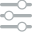
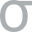

In [2]:
fig, rectangles, getter = select_roi(np.random.random(size=(4, 480, 640)), title="Select ROIs", maxdim=650, channel_dimension=0)
# We can limit the number of lines drawn by modifying the tool instance
rectangle_tool = rectangles.tools('rectangles')[fig.fig][0]
rectangle_tool.num_objects = 1
fig.layout

In [3]:
getter()

[]

Define a set of points on an image. The Bokeh tool uses a double-click to create a point. This also shows how to set the points based on the channel select slider:

Column(margin=(3, 3))
    [0] Row(height=40, margin=(0, 0))
        [0] FloatPanel(config={'headerControls': {'maxim...}, contained=False, name='Image Controls', objects=[Row
    [0] Select(name='...], position='center', status='closed')
        [1] Row(height=40, margin=(0, 0))
            [0] StaticText(align='center', margin=(5, 5), value='Display channel')
            [1] IntSlider(end=3, margin=(5, 5), width=200)
        [2] Toggle(height=2, margin=(5, 5, 5, 5), name='Image Controls', sizing_mode='fixed', tags=['3d53b8cb-9624-48cb-bda5-...], visible=False, width=2)
    [1] Bokeh(figure)
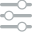
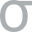

In [4]:
fig2, points, getter2 = select_points(np.random.random(size=(4, 480, 640)), title="Select points", channel_dimension=0)

def _update_points(event):
    image_idx = event.new
    num_points = image_idx
    points_x = np.random.uniform(0, 639, size=num_points)
    points_y = np.random.uniform(0, 479, size=num_points)
    points.update(x=points_x, y=points_y)

fig2.get_channel_select().param.watch(_update_points, 'value')

fig2.layout

In [5]:
getter2()

{'cx': [], 'cy': []}

Define one or more poly-lines on an image, this uses a long-press to start and stop drawing, single-click to add intermediate points. There is a second tool in the toolbar to edit an existing line.

Column(margin=(3, 3))
    [0] Row(height=40, margin=(0, 0))
        [0] FloatPanel(config={'headerControls': {'maxim...}, contained=False, name='Image Controls', objects=[Row
    [0] Select(name='...], position='center', status='closed')
        [1] Row(height=40, margin=(0, 0))
        [2] Toggle(height=2, margin=(5, 5, 5, 5), name='Image Controls', sizing_mode='fixed', tags=['af3fd2f0-6501-403a-afde-...], visible=False, width=2)
    [1] Bokeh(figure)
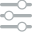
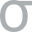
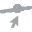

In [6]:
fig4, lines, getter4 = define_line(np.random.random(size=(480, 640)), title="Define lines")
fig4.layout

In [7]:
getter4()

{'xs': [], 'ys': []}

A more complex interface to manually align two images by defining an affine transform between them:

In [8]:
circle_image = (np.linalg.norm(np.mgrid[-200: 200, -300: 300], axis=0) < 100)
circle_image_shifted = np.roll(circle_image, (-50, 80))

Column
    [0] Row
        [0] Column(margin=(3, 3))
            [0] Row(height=40, margin=(0, 0))
                [0] FloatPanel(config={'headerControls': {'maxim...}, contained=False, name='Static image', objects=[Row
    [0] Select(name='...], position='center', status='closed')
                [1] FloatPanel(config={'headerControls': {'maxim...}, contained=False, name='Moving image', objects=[Row
    [0] Select(name='...], position='center', status='closed')
                [2] Row(height=40, margin=(0, 0))
                    [0] Bokeh(Slider)
                    [1] Checkbox(align='end', name='Show image difference')
                    [2] Button(button_type='primary', max_width=125, name='Undo')
                [3] Toggle(height=2, margin=(5, 5, 5, 5), name='Static image', sizing_mode='fixed', tags=['1cdd2563-b44b-42b0-80bb-...], visible=False, width=2)
                [4] Toggle(height=2, margin=(5, 5, 5, 5), name='Moving image', sizing_mode='fixed', tags=['f1dd50b5-4645-4be4-a8b6-...], visible=False, width=2)
            [1] Bokeh(figure)
        [1] Column
            [0] FloatInput(end=100.0, name='Translate step (px):', start=0.1, value=1.0, width=125)
            [1] Column(margin=(0, 0))
                [0] Row(margin=(0, 0))
                    [0] Spacer(height=40, margin=(2, 2), sizing_mode='fixed', width=40)
                    [1] Button(button_type='primary', height=40, margin=(2, 2), name='△', sizing_mode='fixed', width=40)
                    [2] Spacer(height=40, margin=(2, 2), sizing_mode='fixed', width=40)
                [1] Row(margin=(0, 0))
                    [0] Button(button_type='primary', height=40, margin=(2, 2), name='◁', sizing_mode='fixed', width=40)
                    [1] Button(button_type='primary', height=40, margin=(2, 2), name='▽', sizing_mode='fixed', width=40)
                    [2] Button(button_type='primary', height=40, margin=(2, 2), name='▷', sizing_mode='fixed', width=40)
            [2] Checkbox(name='Center-origin', value=True, width=125)
            [3] FloatInput(end=100.0, name='Rotate step (deg):', start=0.1, value=1.0, width=125)
            [4] Row(margin=(0, 0))
                [0] Spacer(height=40, margin=(2, 2), sizing_mode='fixed', width=40)
                [1] Button(button_type='primary', height=40, margin=(2, 2), name='↶', sizing_mode='fixed', width=40)
                [2] Button(button_type='primary', height=40, margin=(2, 2), name='↷', sizing_mode='fixed', width=40)
            [5] FloatInput(end=100.0, name='Scale step (%):', start=0.1, value=1.0, width=125)
            [6] Column(margin=(0, 0))
                [0] Row(margin=(0, 0))
                    [0] Spacer(align=('end', 'center'), height=20, margin=(2, 2), sizing_mode='fixed', width=20)
                    [1] StaticText(align=('end', 'center'), height=20, margin=(2, 2), sizing_mode='fixed', value='X:', width=20)
                    [2] Button(button_type='primary', height=40, margin=(2, 2), name='▷ ◁', sizing_mode='fixed', width=40)
                    [3] Button(button_type='primary', height=40, margin=(2, 2), name='◁ ▷', sizing_mode='fixed', width=40)
                [1] Row(margin=(0, 0))
                    [0] Spacer(align=('end', 'center'), height=20, margin=(2, 2), sizing_mode='fixed', width=20)
                    [1] StaticText(align=('end', 'center'), height=20, margin=(2, 2), sizing_mode='fixed', value='Y:', width=20)
                    [2] Button(button_type='primary', height=40, margin=(2, 2), name='▷ ◁', sizing_mode='fixed', width=40)
                    [3] Button(button_type='primary', height=40, margin=(2, 2), name='◁ ▷', sizing_mode='fixed', width=40)
                [2] Row(margin=(0, 0))
                    [0] Spacer(align=('end', 'center'), height=20, margin=(2, 2), sizing_mode='fixed', width=20)
                    [1] StaticText(align=('end', 'center'), height=20, margin=(2, 2), sizing_mode='fixed', value='XY:', width=20)
                    [2] Button(button_type='primar
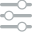
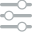

In [9]:
layout3, getter3 = fine_adjust(circle_image, circle_image_shifted)
layout3

In [10]:
getter3()

<AffineTransform(matrix=
    [[1., 0., 0.],
     [0., 1., 0.],
     [0., 0., 1.]]) at 0x224d7e23170>

This panel lets us extract a line profile from an image, with perpendicular averaging. This is not currently compatible with stacks, but could be made to be so.

Row
    [0] Column(margin=(3, 3))
        [0] Row(height=40, margin=(0, 0))
            [0] FloatPanel(config={'headerControls': {'maxim...}, contained=False, name='Image Controls', objects=[Row
    [0] Select(name='...], position='center', status='closed')
            [1] Row(height=40, margin=(0, 0))
                [0] StaticText(align='center', margin=(2, 2), value='Sampling (pt-per-px):')
                [1] FloatInput(end=5.0, start=1.0, step=0.5, value=1.5, width=65)
                [2] IntSlider(end=200, name='Width (px)', width=220)
            [2] Toggle(height=2, margin=(5, 5, 5, 5), name='Image Controls', sizing_mode='fixed', tags=['8ca16127-f63b-468d-a867-...], visible=False, width=2)
        [1] Bokeh(figure)
    [1] Bokeh(figure)
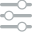
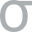
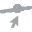

In [11]:
layout_profile, getter_profile = sampling_tool(np.random.random(size=(480, 640)))
layout_profile

In [12]:
getter_profile()

{'points': {'xs': [], 'ys': []},
 'sampling': 1.5,
 'width': 0,
 'profile': {'index': array([0]), 'xvals': array([0]), 'yvals': array([0])}}